<a href="https://colab.research.google.com/github/Takaros96/Multiple-Linear-Regression-with-scikit-learn/blob/main/Coursera_guided_projects_Multiple_Linear_Regression_with_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#in multiple linear regression we have multiple coefficients

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('Advertising.csv')

In [ ]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


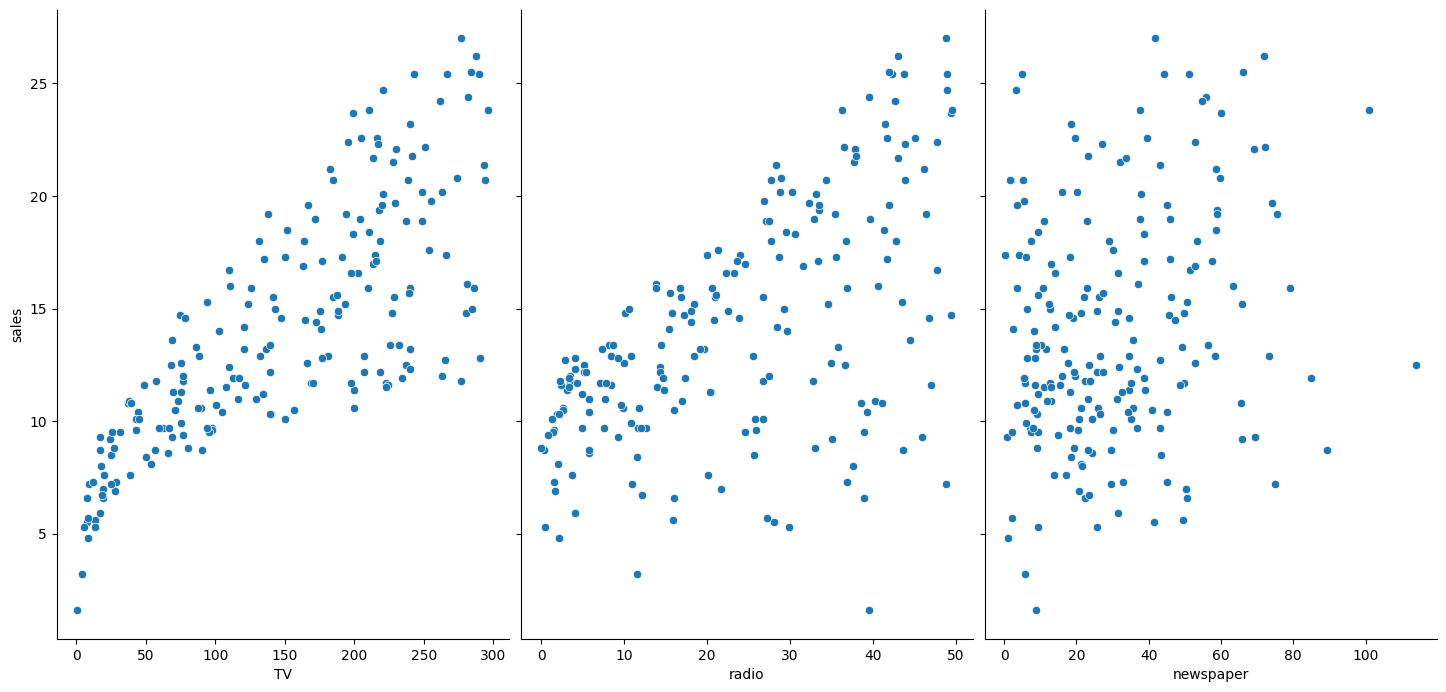

In [ ]:
sns.pairplot(df,x_vars=['TV','radio','newspaper'],y_vars='sales',height=7,aspect=0.7)

In [ ]:
sns.pairplot(df[2:])

In [ ]:
from sklearn.linear_model import LinearRegression
X=df.drop(columns=['sales'])
y=df['sales']

lm1=LinearRegression()
lm1.fit(X,y)

print(lm1.intercept_)
print(lm1.coef_)

3.005209420097845
[-0.00057983  0.04577592  0.18838318 -0.00124333]


In [ ]:
list(zip(['TV','radio','newspaper'],lm1.coef_))

[('TV', -0.0005798278087352435),
 ('radio', 0.04577591959744518),
 ('newspaper', 0.18838317597693344)]

In [ ]:
#do all the predictors help explain the response?
from sklearn.metrics import r2_score
lm2=LinearRegression().fit(X[['TV','radio']],y)
lm2_pred=lm2.predict(X[['TV','radio']])

print(f"R2:{r2_score(y,lm2_pred)}")

R2:0.8971942610828957


In [ ]:
lm3=LinearRegression().fit(X[['TV','radio','newspaper']],y)
lm3_pred=lm3.predict(X[['TV','radio','newspaper']])

print(f"R2:{r2_score(y,lm3_pred)}")

R2:0.8972106381789522


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X=df.drop(columns=['sales'])
y=df['sales']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=123)

lm4=LinearRegression().fit(X_train,y_train)
lm4_pred=lm4.predict(X_test)

print(f"RMSE:{np.sqrt(mean_squared_error(y_test,lm4_pred))}")
print(f"R2:{r2_score(y_test,lm4_pred)}")

RMSE:1.4685893713526827
R2:0.9172128193522601


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X=df.drop(columns=['sales','newspaper'])
y=df['sales']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=123)

lm5=LinearRegression().fit(X_train,y_train)
lm5_pred=lm5.predict(X_test)

print(f"RMSE:{np.sqrt(mean_squared_error(y_test,lm5_pred))}")
print(f"R2:{r2_score(y_test,lm5_pred)}")

RMSE:1.4688900410239225
R2:0.9171789172378265


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


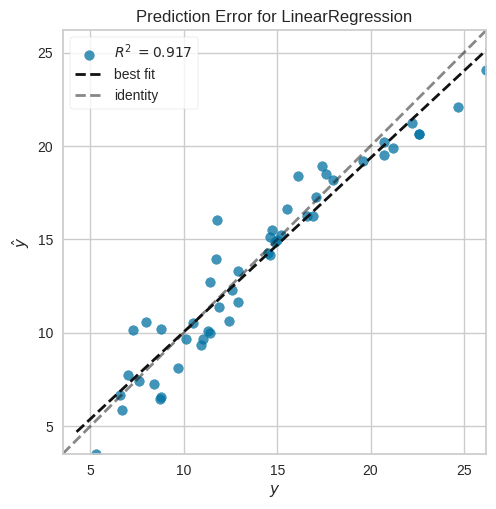

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
#yellowbrick is a data visualization and model diagnostics library
from yellowbrick.regressor import PredictionError,ResidualsPlot

visualizer=PredictionError(lm5).fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof()

In [ ]:
df['interaction']=df['TV']*df['radio']

X=df[['TV','radio','interaction']]
y=df['sales']

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=123)


lm6=LinearRegression().fit(X_train,y_train)
lm6_pred=lm6.predict(X_test)

print(f"RMSE:{np.sqrt(mean_squared_error(y_test,lm6_pred))}")
print(f"R2:{r2_score(y_test,lm6_pred)}")

RMSE:0.7360538448310991
R2:0.97920391889716


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


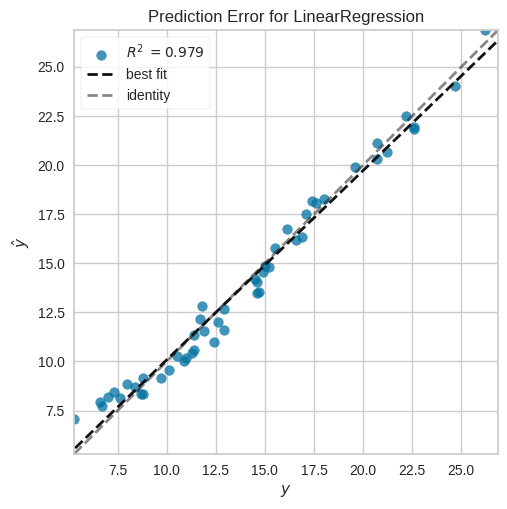

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:

visualizer=PredictionError(lm6).fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof()

In [ ]:
#a simple linear regression model ha a single predictor and response,whereas a
#multiple linear regression model has 2 or more predictors and a response